###### Import - Install Dependecies

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python mediapipe sklearn matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Using cached sklearn-0.0.post5-py3-none-any.whl
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
    Running setup.py install for tensorflow-gpu: started
    Running setup.py install for tensorflow-gpu: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\USER\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\USER\\AppData\\Local\\Temp\\pip-install-prwardh_\\tensorflow-gpu_bfb564ed6aa14be4bd9c1caa630efd4d\\setup.py'"'"'; __file__='"'"'C:\\Users\\USER\\AppData\\Local\\Temp\\pip-install-prwardh_\\tensorflow-gpu_bfb564ed6aa14be4bd9c1caa630efd4d\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\USER\AppData\Local\Temp\pip-wheel-5ddc2ptu'
       cwd: C:\Users\USER\AppData\Local\Temp\pip-install-prwardh_\tensorflow-gpu_bfb564ed6aa14be4bd9c1caa630efd4d\
  Complete output (17 lines):
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "C:\Users\U

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

###### Keypoint using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image =cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image,results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [5]:
def draw_styled_landmarks(image, results):
    # draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(80, 110,10), thickness = 1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80, 256,121), thickness = 1, circle_radius=1)                     
                             )
    # draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80, 22, 10), thickness = 2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80, 44, 121), thickness = 2, circle_radius=2)
                             )
    # draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121, 22, 76), thickness = 2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121, 44, 250), thickness = 2, circle_radius=2)
                             )
    # draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245, 117,66), thickness = 2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245, 66,230), thickness = 2, circle_radius=2)
                             )

In [6]:
url = 'http://192.168.1.41:8080/video'  ## i used my phone camera as a webcam. if u have webcam write '0' istead url.
cap = cv2.VideoCapture(url)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)as holistic:
    while cap.isOpened():

        # read feed
        ret, frame = cap.read()

        # make detection
        image, results = mediapipe_detection(frame, holistic)
        # print(results)
        
        # draw landmarks
        draw_styled_landmarks(image, results)

        # show to screen
        cv2.imshow('Pencere', image)

        # break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [8]:
draw_landmarks(frame, results)

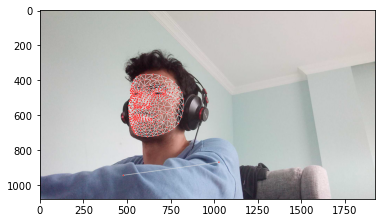

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

###### Extract Keypoint Values

In [10]:
results.pose_landmarks.landmark[0]

x: 0.3114335238933563
y: 0.4959776699542999
z: -0.5630105137825012
visibility: 0.9980282187461853

In [11]:
results.pose_landmarks.landmark[0].y

0.4959776699542999

In [12]:
pose = []

for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [13]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [15]:
result_test = extract_keypoints(results)[:10]

In [16]:
result_test

array([ 0.31143352,  0.49597767, -0.56301051,  0.99802822,  0.3391206 ,
        0.4323132 , -0.55204374,  0.99695647,  0.35562241,  0.43172407])

In [17]:
np.save('0', result_test)

In [18]:
np.load('0.npy')

array([ 0.31143352,  0.49597767, -0.56301051,  0.99802822,  0.3391206 ,
        0.4323132 , -0.55204374,  0.99695647,  0.35562241,  0.43172407])

###### Setup Folders for Collection

In [19]:
## part for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

#actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# thirty videos wort of data
no_sequences = 30

# videos are going to be 30 frames in length
sequence_length = 30

In [20]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass             ## it creates a MP_Data folder

###### Collect Keypoint Values for Training and Testing

In [23]:
url = 'http://192.168.1.41:8080/video'  ## i used my phone camera as a webcam. if u have webcam write '0' istead url.
cap = cv2.VideoCapture(url)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)as holistic:
    
    # loop through actions
    for action in actions:
        # loop through sequences aka videos
        for sequence in range(no_sequences):
            # loop through length aka sequence length
            for frame_num in range(sequence_length):

                # read feed
                ret, frame = cap.read()

                # make detection
                image, results = mediapipe_detection(frame, holistic)
                # print(results)

                # draw landmarks
                draw_styled_landmarks(image, results)
                
                # apply wait logic
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120, 200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 1, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15, 12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15, 12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    
                # New export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # show to screen
                cv2.imshow('Pencere', image)

                # break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: 

In [21]:
cap.release()
cv2.destroyAllWindows()

###### Preprocess Data and Create Labesl and Features

In [24]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [25]:
label_map = {label:num for num, label in enumerate(actions)}

In [26]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [32]:
sequences, labels = [], []

for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [35]:
np.array(sequences).shape  ## 90 videos each which is 30 frames each and 1662 different key points

(90, 30, 1662)

In [36]:
np.array(labels).shape

(90,)

In [37]:
X = np.array(sequences)

In [38]:
y = to_categorical(labels).astype(int)

In [39]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.05)

In [41]:
X_train.shape

(85, 30, 1662)

In [42]:
X_test.shape

(5, 30, 1662)

In [43]:
y_train.shape

(85, 3)

In [44]:
y_test.shape

(5, 3)

###### Build and Train LSTM Neural Network

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [46]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir = log_dir)

In [47]:
model = Sequential()
model.add(LSTM(64, return_sequences = True, activation = 'relu', input_shape = (30, 1662)))
model.add(LSTM(128, return_sequences = True, activation = 'relu'))
model.add(LSTM(64, return_sequences = False, activation = 'relu'))
model.add(Dense(64, activation= 'relu'))
model.add(Dense(32, activation= 'relu'))
model.add(Dense(actions.shape[0], activation= 'softmax'))

In [48]:
X.shape

(90, 30, 1662)

In [50]:
model.compile(optimizer= 'Adam', loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])

In [51]:
model.fit(X_train, y_train, epochs = 2000, callbacks = [tb_callback])

Epoch 1/2000
3/3 [==============================] - 3s 70ms/step - loss: 1.9235 - categorical_accuracy: 0.2941
Epoch 2/2000
3/3 [==============================] - 0s 68ms/step - loss: 2.2672 - categorical_accuracy: 0.4118
Epoch 3/2000
3/3 [==============================] - 0s 67ms/step - loss: 4.7037 - categorical_accuracy: 0.2941
Epoch 4/2000
3/3 [==============================] - 0s 66ms/step - loss: 4.6245 - categorical_accuracy: 0.2588
Epoch 5/2000
3/3 [==============================] - 0s 65ms/step - loss: 6.1790 - categorical_accuracy: 0.3647
Epoch 6/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.3115 - categorical_accuracy: 0.5294
Epoch 7/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.1577 - categorical_accuracy: 0.5176
Epoch 8/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.4055 - categorical_accuracy: 0.5765
Epoch 9/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.1012 - categorical_accuracy: 0.3882
E

KeyboardInterrupt: 

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

###### Make Prediction

In [55]:
res = model.predict(X_test)

1/1 [==============================] - 0s 22ms/step


In [56]:
res[0]

array([7.7991956e-01, 2.2008044e-01, 2.1780852e-10], dtype=float32)

In [66]:
actions[np.argmax(res[3])]

'hello'

In [67]:
actions[np.argmax(y_test[3])]

'thanks'

###### Save Weights

In [ ]:
model.save('action.h5')

In [ ]:
del model

In [ ]:
model.load_weights('action.h5')

###### Evaluation using Confusion Matrix and Accuracy

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
yhat = model.predict(X_test)

In [ ]:
ytrue = np.argmax(y_test, axis = 1).tolist()
yhat = np.argmax(yhat, axis = 1).tolist()

In [ ]:
multilabel_confusion_matrics(ytrue, yhat)

In [ ]:
accuracy_score(ytrue, yhat)

###### Test in Real Time

In [ ]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [ ]:

sequence.reverse()

In [ ]:
len(sequence)

In [ ]:
sequence.append('def')

In [ ]:
sequence.reverse()

In [ ]:
sequence[-30:]

In [ ]:
##  1. new detection variables
sequence = []
sentece = []
threshold = 0.8

url = 'http://192.168.1.41:8080/video'  ## i used my phone camera as a webcam. if u have webcam write '0' istead url.
cap = cv2.VideoCapture(url)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)as holistic:
    while cap.isOpened():

        # read feed
        ret, frame = cap.read()

        # make detection
        image, results = mediapipe_detection(frame, holistic)
        # print(results)
        
        # draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis =0))[0]
            print(np.argmax(res))
         
        #3. Viz logic
        if res[np.argmax(res)] > threshold: 
            if len(sentence) > 0: 
                if actions[np.argmax(res)] != sentence[-1]:
                    sentence.append(actions[np.argmax(res)])
            else:
                sentence.append(actions[np.argmax(res)])

        if len(sentence) > 5: 
            sentence = sentence[-5:]

        # Viz probabilities
        image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # show to screen
        cv2.imshow('Pencere', image)

        # break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
res[np.argmax(res)] > threshold

In [ ]:
(num_sequences,30,1662)

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0))